# Clustering via SVD and PCA analysis

In [338]:
import os, numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

## 1 Example: Iris petals parameters
*EDIT: part 7 useses sklearn datasets.load_iris()*

In [339]:
fisheriris_mat = loadmat(os.path.join('data_processing','media','fisheriris.mat'))
print('keys:',*fisheriris_mat.keys())
names,counts = np.unique(fisheriris_mat['species'], return_counts = True)
names = [a[0] for a in names]
print('names:',names)
print('counts:',counts)

keys: __header__ __version__ __globals__ species meas
names: ['setosa', 'versicolor', 'virginica']
counts: [50 50 50]


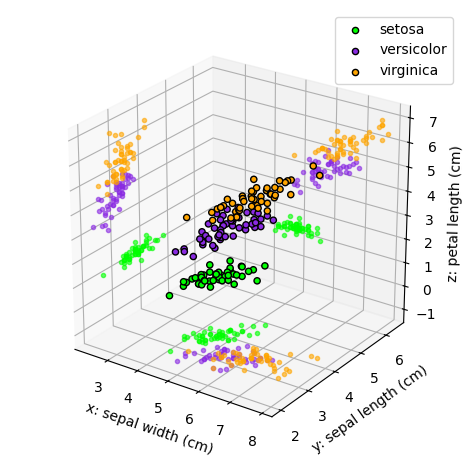

In [340]:
data_all = fisheriris_mat['meas'][:,:-1] # first 3 entries

min_1,min_2,min_3 = np.min(data_all, axis=0)
max_1,max_2,max_3 = np.max(data_all, axis=0)
data_split = np.array_split(data_all,3)  # split equally
fig, ax = plt.subplots(1,subplot_kw=dict(projection='3d'),tight_layout=True)

x,y,z = 0,1,2
a2 = 0.6
offset = 2
for data, name, clr in zip(data_split, names, ['lime', 'blueviolet', 'orange']):
    sc = ax.scatter(*data.T, label=name, alpha = 1,edgecolors='black', color= clr)
    ax.plot(*data[:,[x,y]].T, '.', zdir='z', zs=min_3 - offset, alpha = a2, c = clr)
    ax.plot(*data[:,[x,z]].T, '.', zdir='y', zs=max_2 + offset, alpha = a2, c = clr)
    ax.plot(*data[:,[y,z]].T, '.', zdir='x', zs=min_1 - offset, alpha = a2, c = clr)

ax.set_xlabel('x: sepal width (cm)')
ax.set_ylabel('y: sepal length (cm)')
ax.set_zlabel('z: petal length (cm)')

ax.view_init(elev=25, azim=-55, roll=0)
ax.set_box_aspect((1, 1, 1), zoom=0.9)
plt.legend();
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.1, right=0.6)


# 2 Example cats and dogs

keys cats: __header__ __version__ __globals__ cat
keys dogs: __header__ __version__ __globals__ dog
data shape:  (4096, 80)
64 x 64 = 4096


(-0.5, 63.5, 63.5, -0.5)

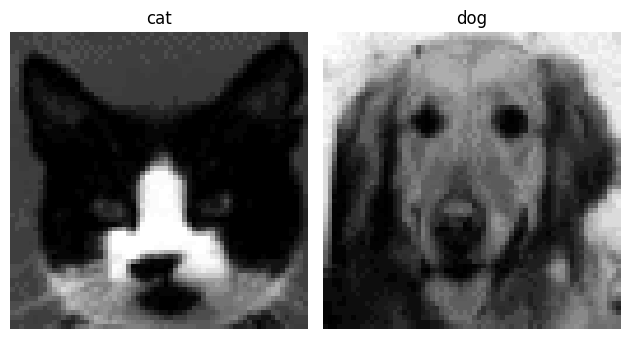

In [341]:
cats = loadmat(os.path.join('data_processing','media','catData.mat'))
dogs = loadmat(os.path.join('data_processing','media','dogData.mat'))
print('keys cats:',*cats.keys())
print('keys dogs:',*dogs.keys())
cats_data = cats['cat']
dogs_data = dogs['dog']
print('data shape: ', dogs_data.shape)
print('64 x 64 =', 64*64)
fig, ax = plt.subplots(1,2,tight_layout=True)
cat_w_img = cats_data[:,0].reshape(64,64).T
ax[0].imshow(cat_w_img, 'gray')
dog_w_img = dogs_data[:,0].reshape(64,64).T
ax[1].imshow(dog_w_img, 'gray')
ax[0].set_title('cat')
ax[0].axis('off')
ax[1].set_title('dog')
ax[1].axis('off')

keys cats: __header__ __version__ __globals__ cat_wave


(-0.5, 31.5, 31.5, -0.5)

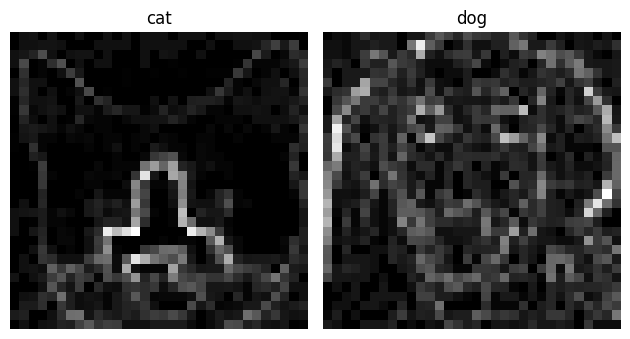

In [342]:
cats2 = loadmat(os.path.join('data_processing','media','catData_w.mat'))
dogs2 = loadmat(os.path.join('data_processing','media','dogData_w.mat'))
print('keys cats:',*cats2.keys())
cats_data2 = cats2['cat_wave']
dogs_data2 = dogs2['dog_wave']

fig, ax = plt.subplots(1,2,tight_layout=True)
cat_w_img = cats_data2[:,0].reshape(32,32).T
ax[0].imshow(cat_w_img, 'gray')
dog_w_img = dogs_data2[:,0].reshape(32,32).T
ax[1].imshow(dog_w_img, 'gray')
ax[0].set_title('cat')
ax[0].axis('off')
ax[1].set_title('dog')
ax[1].axis('off')

## 2.1 Meaning of $U, \ \Sigma $ and $ V^*$ matrices in SVD factorization
Lets consider a case where different sets of data are packed as columns of matrix $X$.

In our case these are `64 x 64` pixel (data feature) images flattened into columns of shape `F x 1 = 4096 x 1`.

In total we have `N` different images and resulting matrix is of shape `F x N` or if we think of it as packed features- a vector of shape `1 x N`
$$
X=
\begin{bmatrix}
    \begin{bmatrix}
     I \\ m \\ a \\ g \\ e \\ \\ 1 
    \end{bmatrix}
    &
    \begin{bmatrix}
     I \\ m \\ a \\ g \\ e \\ \\ 2 
    \end{bmatrix}
    &
    \dots
    &
    \begin{bmatrix}
     I \\ m \\ a \\ g \\ e \\ \\ N 
    \end{bmatrix}
\end{bmatrix}=
\begin{bmatrix}
    \vec{I}_1 & \vec{I}_2 & \dots & \vec{I}_N 
\end{bmatrix}
$$
***

Truncated SVD decomposes matrix $X$ as follows
$$ X = U \Sigma V^* $$
Where, due to rules of matrix multiplication:
* shape of $U$ is `F x R` or `1 x R` in feature representation.
* $\Sigma$ is square diagonal matrix of shape `R x R`
* shape of $V^T$ is `R x N`

so
$$ \mathrm{dim}(X) = [1\times N] = [1\times R][[R\times R][R\times N]= \mathrm{dim}(U \Sigma V^*)$$
***

Matrix $U$ `( F x r or 1 x R)` is said to contain left singular vectors or `modes` $\vec{m}_i$ as columns, which capture information about rows of input matrix $X$:
$$U=
\begin{bmatrix}
    \begin{bmatrix}
      M \\ o \\ d \\ e \\ \\1 
    \end{bmatrix}
    &
    \begin{bmatrix}
     M \\ o \\ d \\ e \\ \\2 
    \end{bmatrix}
    &
    \dots
    &
    \begin{bmatrix}
     M \\ o \\ d \\ e \\ \\ R 
    \end{bmatrix}
\end{bmatrix}=
\begin{bmatrix}
    \vec{m}_1 & \vec{m}_2 & \dots & \vec{m}_R 
\end{bmatrix}
$$
Since our matrix $X$ holds features as columns, matrix $U$ will capture `R` relations between images for each feature (pixel).

i.e if $$\mathrm{pixel \ 1 \ of \ image \ K} = (\vec{I}_K)_1$$
$\vec{m_1}$ encodes relation of this particular feature for all entries
$$\vec{m_1} = f[(\vec{I}_1)_1,(\vec{I}_2)_1,\dots, (\vec{I}_N)_1]$$
***

Matrix $\Sigma$ holds singular values $\sigma_i$ (similar to eigenvalues) for modes (like eigenvectors) in $U$ or $V$
$$\Sigma=
\begin{bmatrix}
    \sigma_1  &         & & \\ 
              & \sigma_2& & \\
      & &        \ddots & &    \\
      & & & \sigma_R 
\end{bmatrix}
$$

Matrix $V$ `(N x R)` (notice its not $V^*$) is said to capture information about columns of $X$.<br>
$$
V = 
\begin{bmatrix}
    \vec{v}_1 & \vec{v}_2 & \dots & \vec{v}_R 
\end{bmatrix}
$$

so 
$$
X = 
U \Sigma V^*=
\begin{bmatrix}
    \vec{m}_1 & \vec{m}_2 & \dots & \vec{m}_R 
\end{bmatrix}
\begin{bmatrix}
    \sigma_1  &         & & \\ 
              & \sigma_2& & \\
      & &        \ddots & &    \\
      & & & \sigma_R 
\end{bmatrix}
\begin{bmatrix}
    \vec{v}_1^* \\ \vec{v}_2^* \\ \vdots \\ \vec{v}_R^* 
\end{bmatrix} \rightarrow
$$

$$
X = 
\begin{bmatrix}
    \sigma_1\vec{m}_1 & \sigma_2\vec{m}_2 & \dots & \sigma_R\vec{m}_R 
\end{bmatrix}
\begin{bmatrix}
    \vec{v}_1^* \\ \vec{v}_2^* \\ \vdots \\ \vec{v}_R^* 
\end{bmatrix} = 
\sum_{i=1}^R \sigma_i \vec{m}_i  \vec{v}_i^* = 
\sum_{i=1}^R X_i^\prime 
$$
This equality describes whole matrix $X$ and its not clear what modes $\vec{v_i^*}$ mean for our column data.<br>

There are two ways of showing meaning:
1. by math
2. by intuition (and math)
***

### 2.1.1 Math approach

Multiplication $\vec{m}_i \vec{v}_i^*$ is a dyadic product and results in a matrix $X^\prime$ of shape $[F \times 1][1 \times N] = [F \times N]$
$$
X = 
\sum_{i=1}^R \sigma_i \vec{m}_i  \vec{v}_i^* = 
\sum_{i=1}^R X_i^\prime 
$$

$$ 
X_k^\prime = 
\sigma_k
\begin{bmatrix}
    (\vec{m}_k)_1 (\vec{v}_k^*)_1 & (\vec{m}_k)_1 (\vec{v}_k^* )_2 & \dots & (\vec{m}_k)_1 (\vec{v}_k^* )_N \\
    (\vec{m}_k)_2 (\vec{v}_k^*)_1 & (\vec{m}_k)_2 (\vec{v}_k^* )_2 & \dots & (\vec{m}_k)_2 (\vec{v}_k^* )_N \\
    \vdots & & \ddots  &  \\
    (\vec{m}_k)_F (\vec{v}_k^*)_1 & (\vec{m}_k)_F (\vec{v}_k^* )_2 & \dots & (\vec{m}_k)_F (\vec{v}_k^* )_N \\
\end{bmatrix}=
$$
$$
=
\sigma_k
\begin{bmatrix}
    (\vec{v}_k^*)_1 \vec{m}_k  & (\vec{v}_k^*)_2 \vec{m}_k  & \dots & (\vec{v}_k^*)_N \vec{m}_k  \\
\end{bmatrix}
$$


Lets see how are matrices $X_k^\prime$ related to column 1 of $X$, which is a first input image.
$$
\mathrm{column \ 1 \ of \ } X=
\vec{I}_1 = 
\sum_{k=1}^R \mathrm{column \ 1 \ of \ } X_k^\prime =
\sum_{k=1}^R \sigma_k (\vec{v}_k^*)_1 \vec{m}_k
$$
$$
\vec{I}_1 = 
\begin{bmatrix}
    \sigma_1\vec{m}_1 & \sigma_2\vec{m}_2 & \dots & \sigma_R\vec{m}_R 
\end{bmatrix}
\begin{bmatrix}
    (\vec{v}_1^*)_1\\ 
    (\vec{v}_2^*)_1\\ 
    \vdots          \\
    (\vec{v}_R^*)_1\\ 
\end{bmatrix} 
$$

From this we can deduce that columns of $V^*$ hold coefficients for expansion of columns of $M$.

***

### 2.1.2 Intuition / dimensions approach
By the dimensions of columns (modes) of $U$, which are the same as dimensions of input data, we see that they can be a basis for linear expansion.

For simplicity lets consider for a moment that $\Sigma = I$, and/or $\forall i: \sigma_i = 1$

Each image vector $\vec{I}_i$ should be represented as a linear combination of modes:
$$
\vec{I}_i = v_1\vec{m}_1 + \dots + v_R\vec{m}_R
$$
From matrix multiplication rules, we can expect that coeficients $\{v_1,\dots,v_R\}$ are held in columns of matrix $V^*$
$$
\vec{I}_i = v_{1,i}\vec{m}_1 + \dots + v_{R,i}\vec{m}_R=
\begin{bmatrix}
    \vec{m}_1 & \vec{m}_2 & \dots & \vec{m}_R 
\end{bmatrix}
\begin{bmatrix}
    v_{1,i} \\ v_{2,i} \\ \dots \\ v_{R,i}
\end{bmatrix}
$$

Or for $N$ images we use matrix product
$$M = 
\begin{bmatrix}
    \vec{I}_1 & \vec{I}_2 & \dots & \vec{I}_N 
\end{bmatrix}=
U  V^*=
\begin{bmatrix}
    \vec{m}_1 & \vec{m}_2 & \dots & \vec{m}_R 
\end{bmatrix}
\begin{bmatrix}
    \begin{bmatrix}
        v_{1,1} \\ v_{2,1} \\ \dots \\ v_{R,1}
    \end{bmatrix}&
    \dots &
    \begin{bmatrix}
        v_{1,N} \\ v_{2,N} \\ \dots \\ v_{R,N}
    \end{bmatrix}
\end{bmatrix}
$$

$$[1\times N] = [1\times R][R\times N]$$

We come to same conclusion.

## 3 Lets perform SVD decomposition on image and wavelet data representation

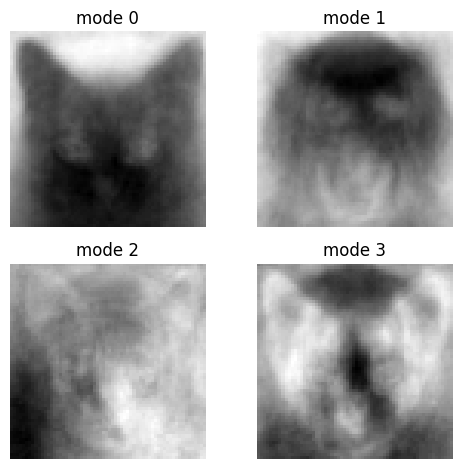

In [343]:
cats_dogs = np.hstack((cats_data,dogs_data))
U,S,V = np.linalg.svd(cats_dogs-np.mean(cats_dogs, axis= 0),full_matrices=False)
modes = [0,1,2,3]
fig, ax = plt.subplots(2,2,tight_layout=True)
ax = ax.flatten()
for i,mode in enumerate(modes):
    U_trunk = U[:,[mode]] 
    S_trunk = np.diag(S[[mode]])        # can just scalar mulitply
    img = (U_trunk @ S_trunk).reshape(64,64).T
    ax[i].imshow(img, 'gray')
    ax[i].set_title('mode '+str(i))
    ax[i].axis('off')

(1024, 160)


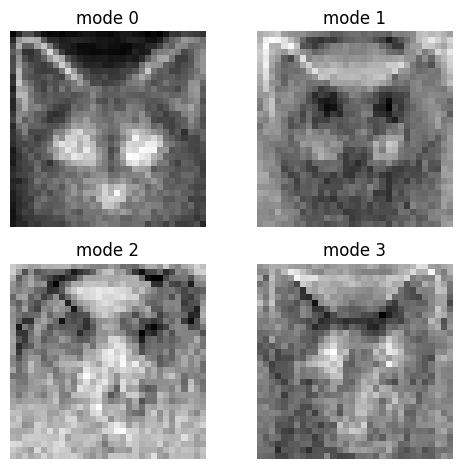

In [344]:
cats_dogs2 = np.hstack((cats_data2,dogs_data2)); print(cats_dogs2.shape)
U2,S2,V2 = np.linalg.svd(cats_dogs2-np.mean(cats_dogs2, axis= 0),full_matrices=False)
modes = [0,1,2,3]
fig, ax = plt.subplots(2,2,tight_layout=True)
ax = ax.flatten()
for i,mode in enumerate(modes):
    U2_trunk = U2[:,[mode]] 
    S2_trunk = np.diag(S2[[mode]])
    img = (U2_trunk @ S2_trunk).reshape(32,32).T
    ax[i].imshow(img, 'gray')
    ax[i].set_title('mode '+str(i))
    ax[i].axis('off')

## 4 Do cats and dogs have different coefficients for same modes?
Since we know that first 80 entries of M contain only cats 
$$
\vec{I}^{cats}=
\begin{bmatrix}
    \vec{I}_1 & \vec{I}_2 & \dots & \vec{I}_{80} 
\end{bmatrix}
$$
(and other half only dogs $\vec{I}^{dogs}$)

first 80 columns of $V(i,j)$ contains weights of modes that are common for cats
$$
\underset{j\in{[1,80]}}{V^{cats}}=
\begin{bmatrix}
    \begin{bmatrix}
        v_{1,1}  \\ \vdots \\ v_{R,1}
    \end{bmatrix}&
    \dots &
    \begin{bmatrix}
        v_{1,80}  \\ \vdots \\ v_{R,80}
    \end{bmatrix}
\end{bmatrix}
$$
(and similarly for dogs)

Each row of this matrix will contain weights of specific mode for only cats or only dogs

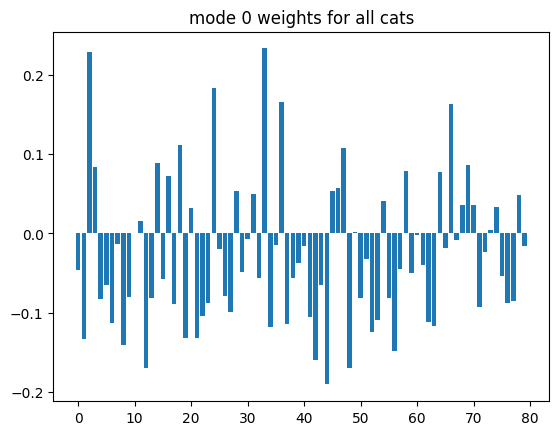

In [345]:
aa = V[0,:80]
plt.bar(range(len(aa)),aa)
plt.title('mode 0 weights for all cats');

We can select few main ranks and analyze distribution of weights for cats and dogs separately.

For this we gather weights in histogram.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


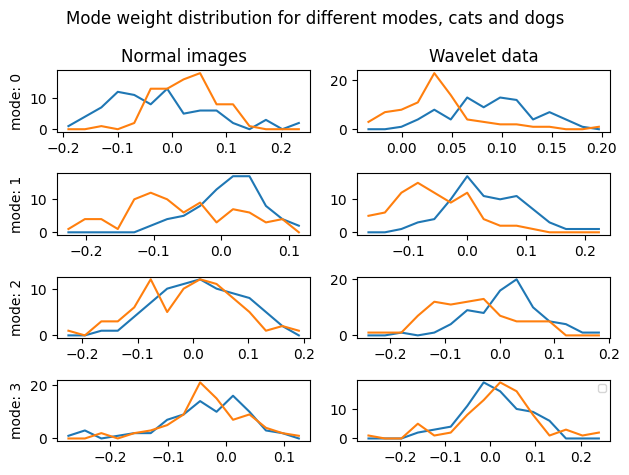

In [355]:
modes_test = [0,1,2,3]
bins = 15
fig,axs = plt.subplots(4,2,tight_layout=True)
axs[0,0].set_title('Normal images')
axs[0,1].set_title('Wavelet data')
for k, Vv in enumerate([V,V2]):
    for i,mode in enumerate(modes_test):
        weights_all = Vv[mode,...]
        mn,mx = np.min(weights_all),np.max(weights_all)
        xbin = np.linspace(mn,mx,bins)
        xbin_edges = np.append(xbin,xbin[-1]+(xbin[1]-xbin[0])) - (xbin[1]-xbin[0])/2

        pdf1 = np.histogram(Vv[i,:80],bins=xbin_edges)[0]
        pdf2 = np.histogram(Vv[i,80:],bins=xbin_edges)[0]
        axs[i,k].plot(xbin,pdf1)
        axs[i,k].plot(xbin,pdf2)
        if k == 0:
            axs[i,k].set_ylabel(f'mode: {i}')
        

plt.suptitle('Mode weight distribution for different modes, cats and dogs', fontsize=12)
plt.legend(fontsize = 7) 

Additionally, we can analyze weights as coordinates in latent space 

Text(0.5, 0.98, 'Projection of data into latent space')

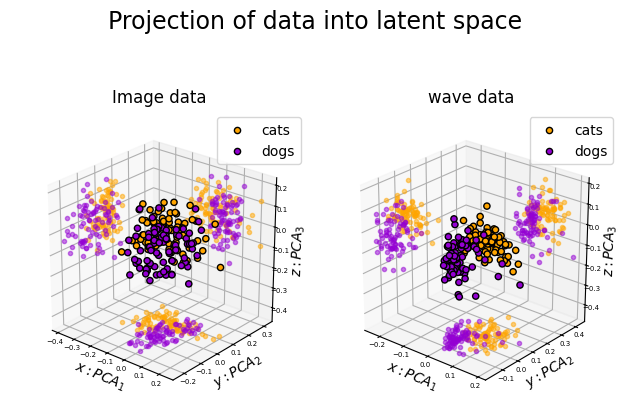

In [369]:
fig, ax = plt.subplots(1,2,subplot_kw=dict(projection='3d'),tight_layout=True)
ax[0].set_title('Image data')
ax[1].set_title('wave data')
x,y,z = 0,1,2
offset = 0.2
a2 = 0.5
for k, Vv in enumerate([V,V2]):
    
    subdata = Vv[:3]
    mn1,mn2,mn3 = np.min(subdata, axis = 1)
    mx1,mx2,mx3 = np.max(subdata, axis = 1)
    d1,d2 = subdata[:,:80],subdata[:,80:]

    ax[k].scatter(*d1, label='cats', alpha = 1, edgecolors='black', color= 'orange')
    ax[k].plot(*d1[[x,y]], '.', zdir='z', zs=mn3 - offset, alpha = a2, c = 'orange')
    ax[k].plot(*d1[[x,z]], '.', zdir='y', zs=mx2 + offset, alpha = a2, c = 'orange')
    ax[k].plot(*d1[[y,z]], '.', zdir='x', zs=mn1 - offset, alpha = a2, c = 'orange')

    ax[k].scatter(*d2, label='dogs', alpha = 1, edgecolors='black', color= 'darkviolet')
    ax[k].plot(*d2[[x,y]], '.', zdir='z', zs=mn3 - offset, alpha = a2, c = 'darkviolet')
    ax[k].plot(*d2[[x,z]], '.', zdir='y', zs=mx2 + offset, alpha = a2, c = 'darkviolet')
    ax[k].plot(*d2[[y,z]], '.', zdir='x', zs=mn1 - offset, alpha = a2, c = 'darkviolet')

    ax[k].set_xlabel('$x: PCA_1$', labelpad = -9)
    ax[k].set_ylabel('$y: PCA_2$', labelpad = -9)
    ax[k].set_zlabel('$z: PCA_3$', labelpad = -9)
    ax[k].view_init(elev=25, azim=-50, roll=0)
    ax[k].set_box_aspect((1, 1, 1), zoom=0.9)
    
    ax[k].legend();
    ax[k].tick_params(axis='both', labelsize=5, pad = -5)
    # ax[k].tick_params(axis='y', labelsize=5)
    # ax[k].tick_params(axis='z', labelsize=5)

plt.suptitle('Projection of data into latent space', fontsize = 17)